# Wine Quality- Prediction

Problem statement - The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

we should make dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'

# Import Libraries

In [243]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [244]:
#loading data
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [245]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [246]:
df.shape

(1599, 12)

There are 1599 rows and 12 columns

In [247]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have only float and int characteristics. No object dtypes found

In [248]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

This are the columns present where quality is our label/output which has different ratings and we will classify it as score more than or equal to 7 as good quality giving the value as 1 and remaining as bad indicating the value as 0

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no null values

# Missing values 

In [250]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

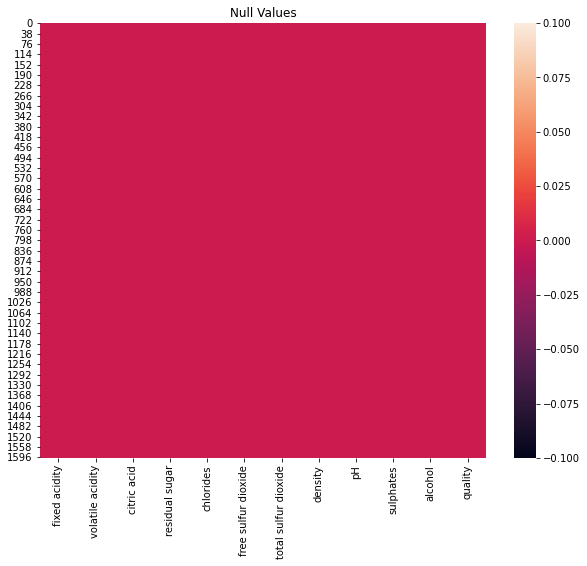

In [251]:
#heatmap on null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are no missing values in the dataset

# Statistics summary

In [252]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [253]:
#exploring data variable
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [254]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

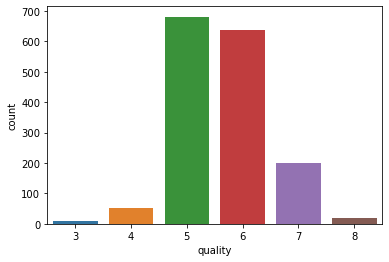

In [255]:
sns.countplot(x=df.quality)

# Correlation Check

In [256]:
dfcor=df.corr()

In [257]:
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


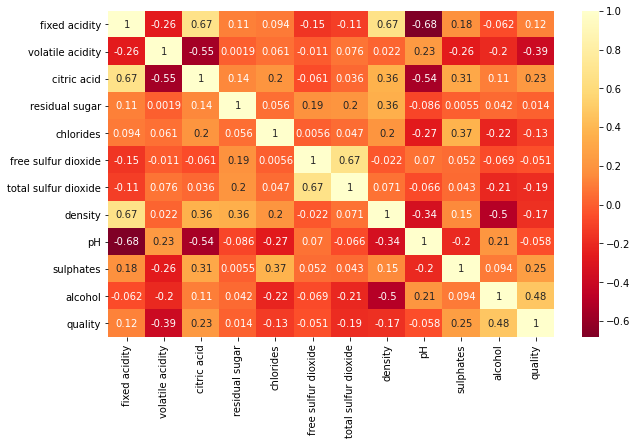

In [258]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observation: pH,free sulphur oxide,residual sugar are nearly zero correlated. Some of the columns are least correlated

# check distribution of  data : Skewness

In [259]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [260]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [261]:
df.shape

(1599, 12)

In [262]:
collist=df.columns.values
ncol=12
nrows=10

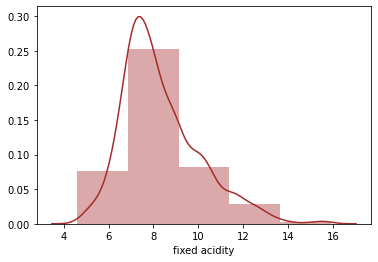

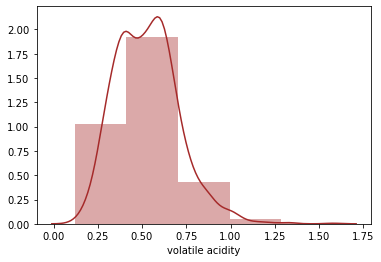

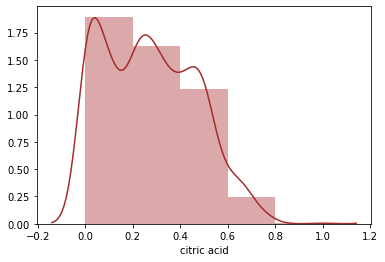

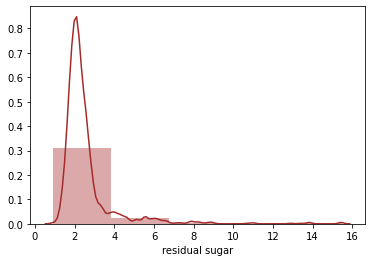

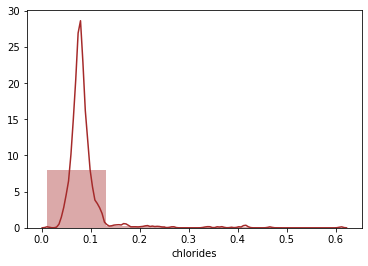

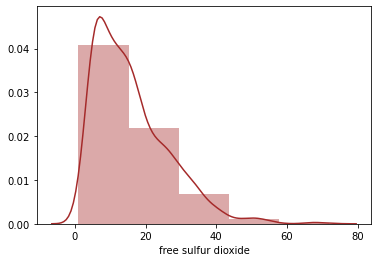

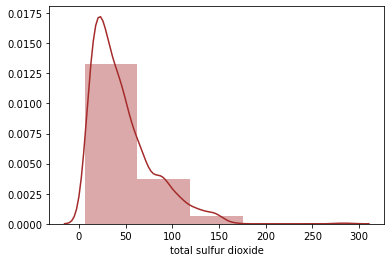

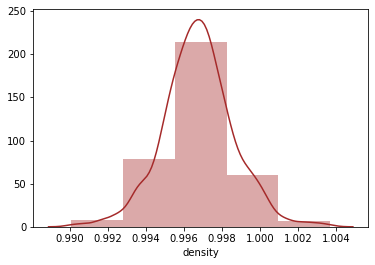

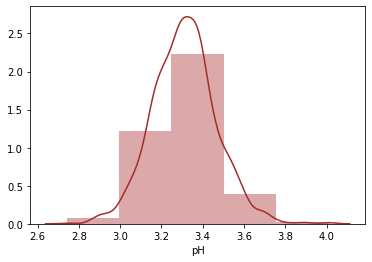

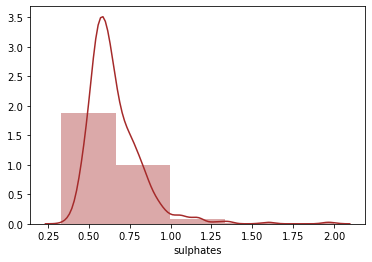

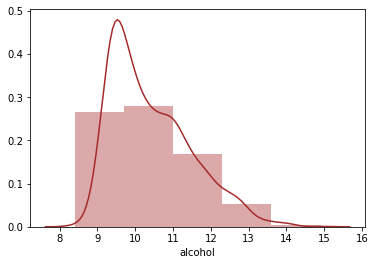

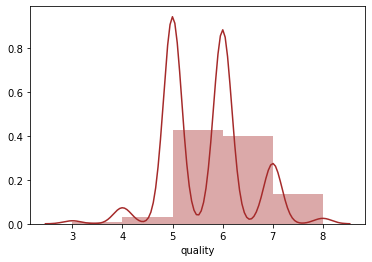

In [263]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='brown',bins=5)
    
for i in range(0,12):
    dtp(i)

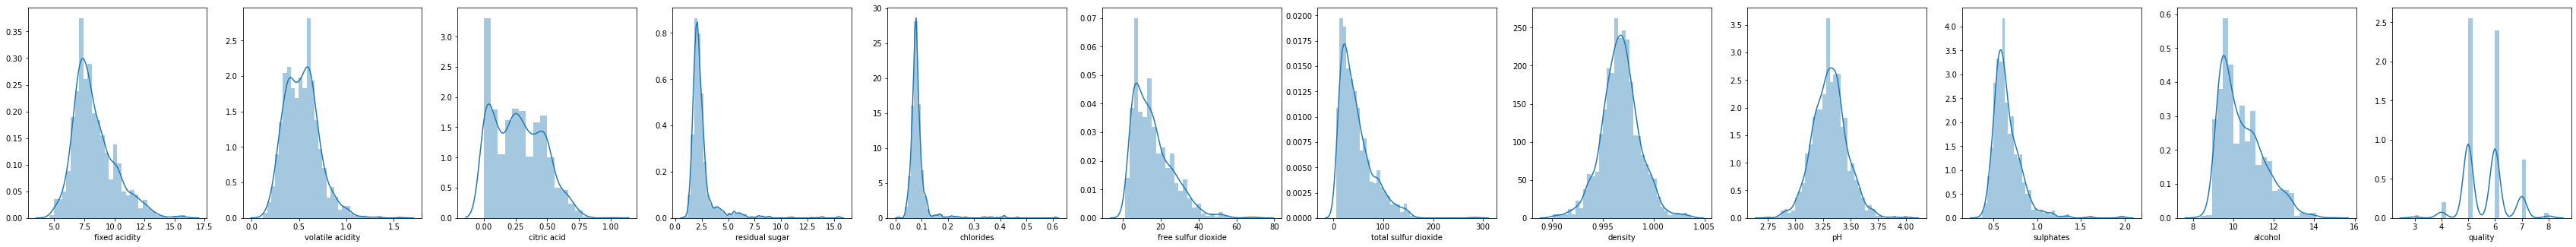

In [264]:
plt.figure(figsize=(60,60))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

observation : 

only ph and density data is normally distributed

other independent variable are right skewed/positively skewed. we have ato remove skewness for all other data

# Detecting Outliers

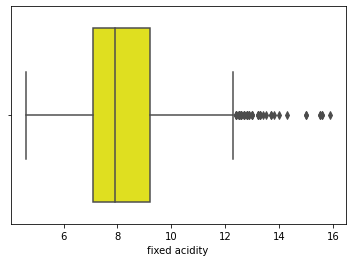

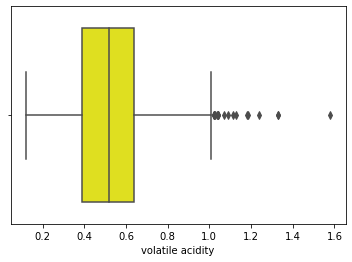

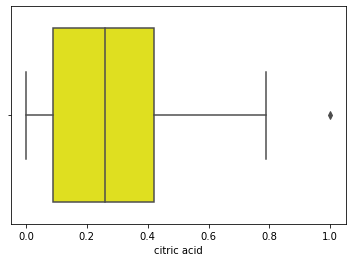

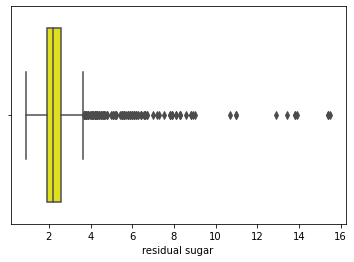

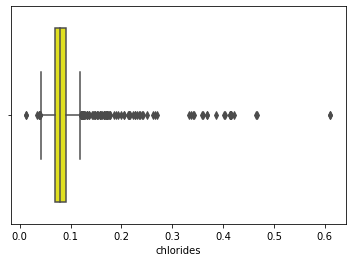

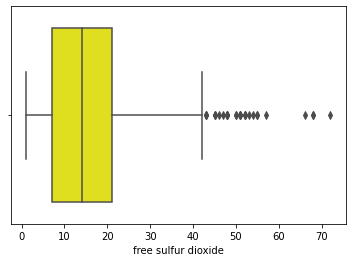

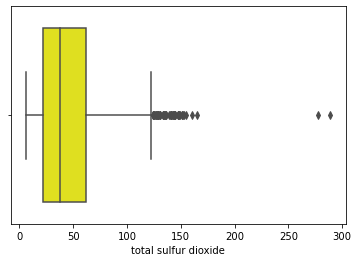

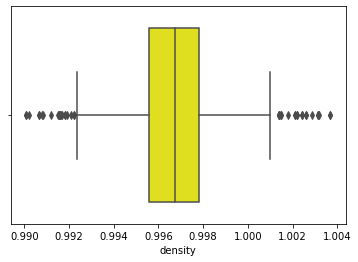

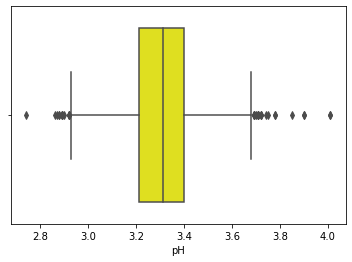

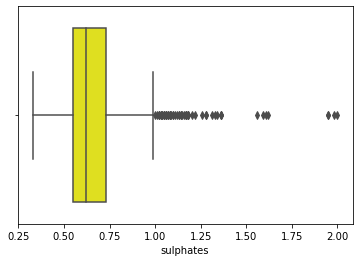

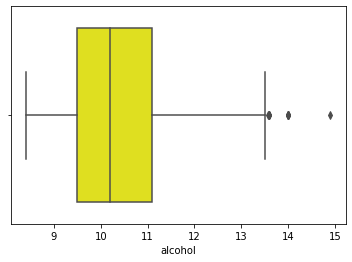

In [265]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],color='yellow')
    
for i in range(0,11):
    bxplt(i)


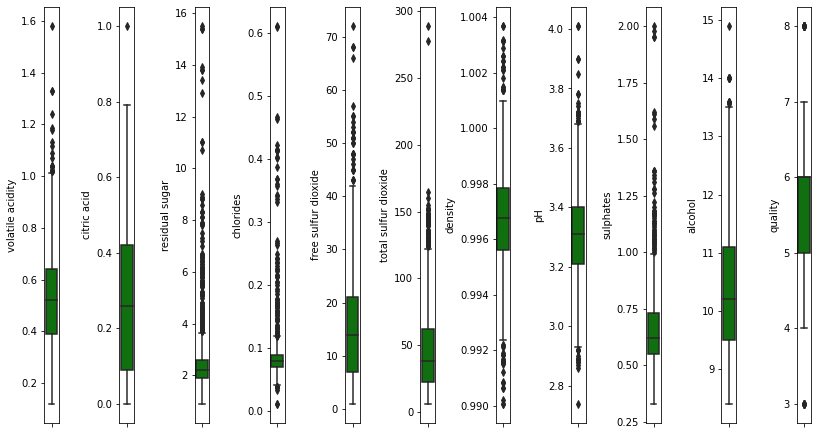

In [266]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

All the columns has outliers. Residual sugar,chlorides 

# Checking distribution relationship 

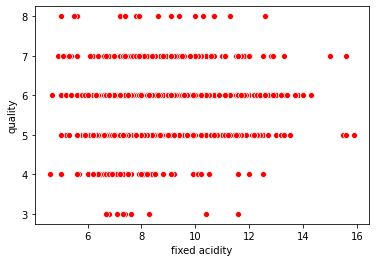

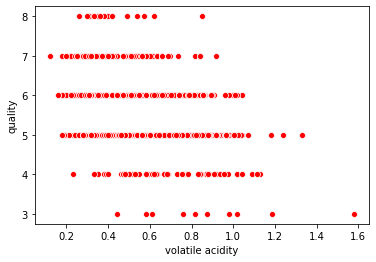

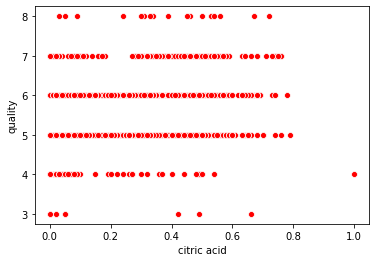

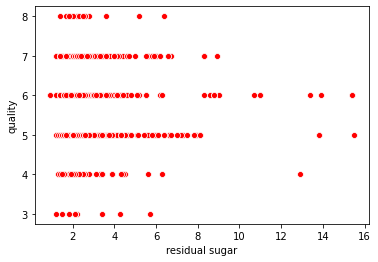

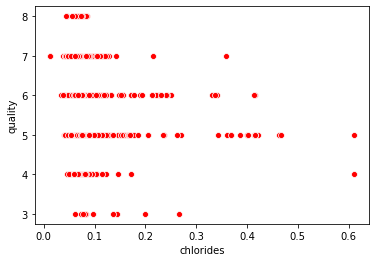

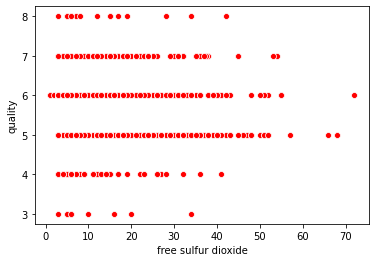

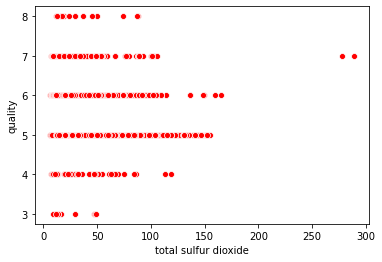

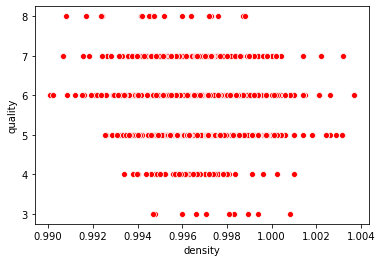

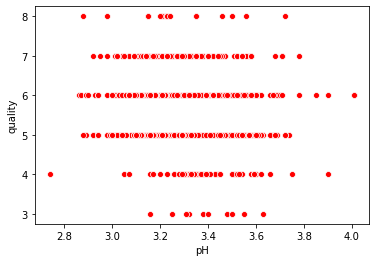

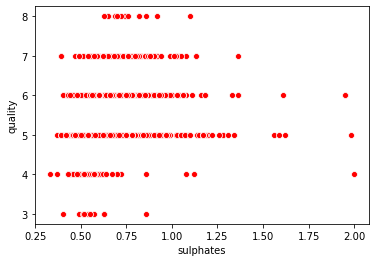

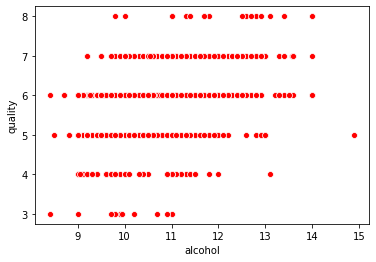

In [267]:
#relationship for each feature name with the output

def dtp(a):
    plt.figure()
    sns.scatterplot(x=df[columns[a]],y=df['quality'],color='red')
    
for i in range(0,11):
    dtp(i)

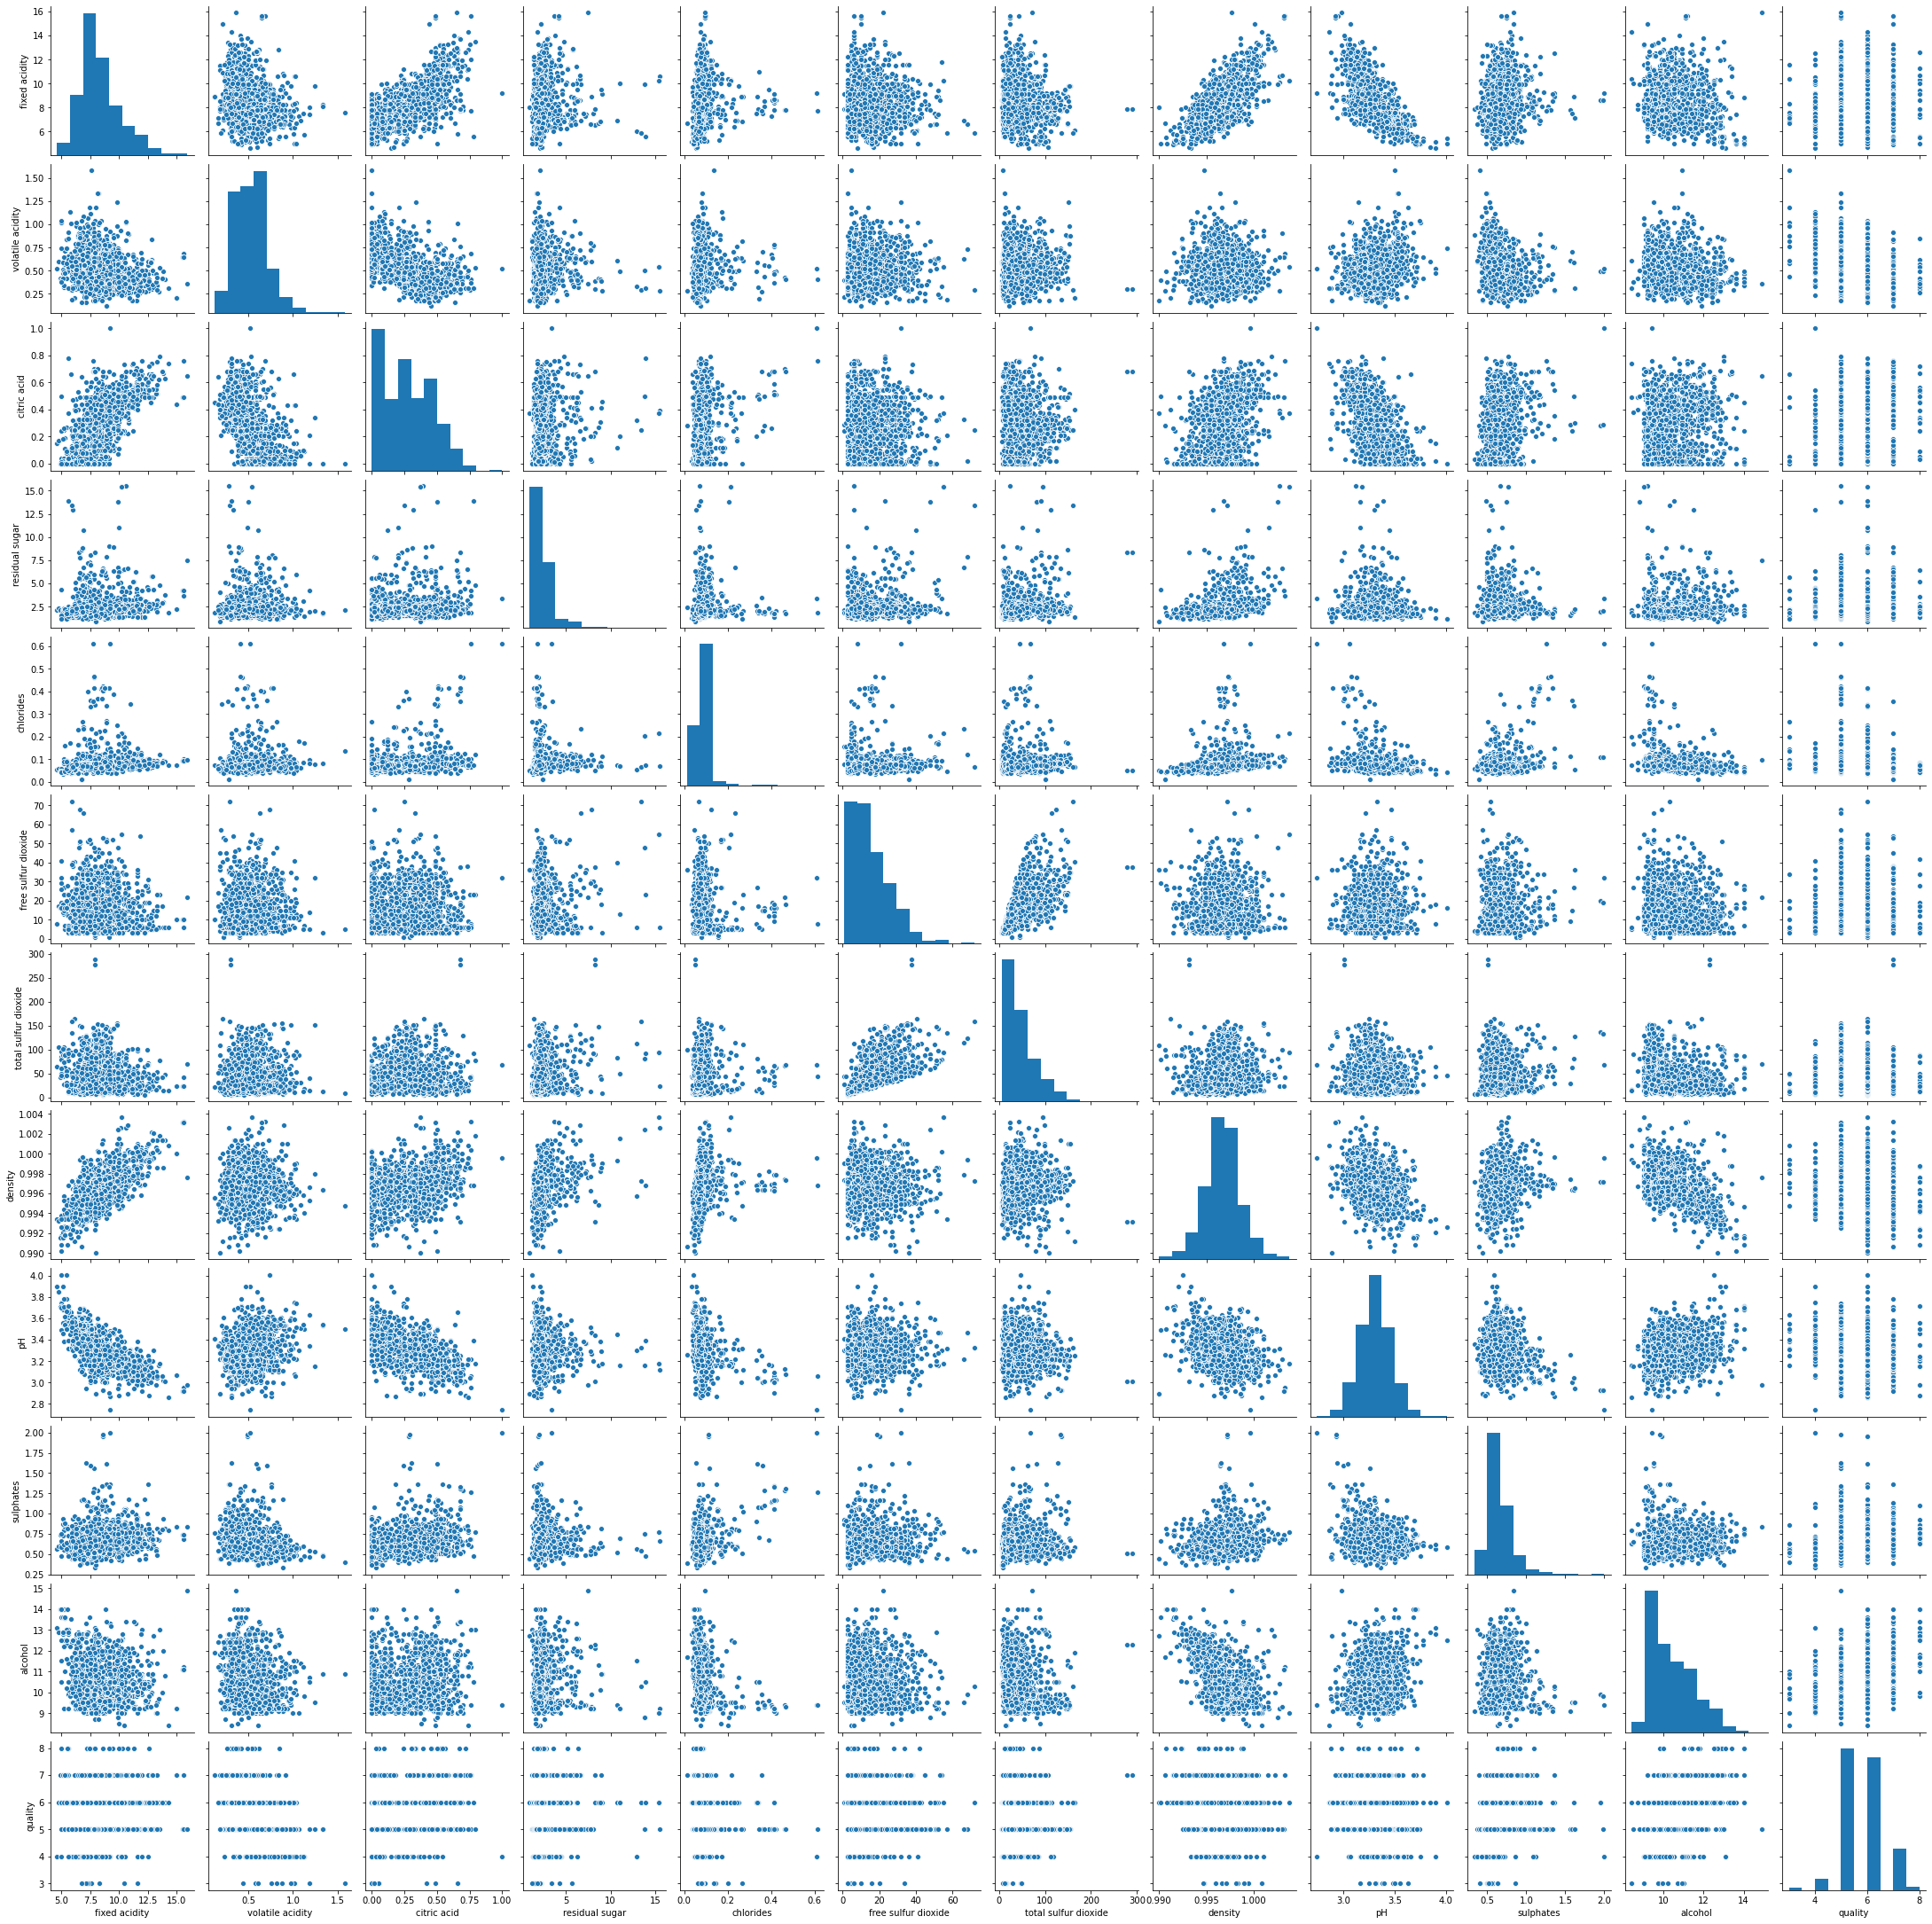

In [268]:
sns.pairplot(df)

we cand drop residual sugar,chlorides and free sulphur di oxide as it alone have large outliers and is has no relationship (nearly zero correlated) with quality

In [269]:
data=df.drop(['residual sugar','chlorides', 'free sulfur dioxide'],axis=1)

In [270]:
data.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,5


In [271]:
#data cleaning and data analysis done

# Removing outliers

In [272]:
#zscore

from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [273]:
threshold=3
print(np.where(z>3))

(array([  13,   15,   17,   38,   43,   45,   81,   86,   88,   91,   92,
         95,  106,  109,  120,  126,  127,  142,  144,  151,  151,  151,
        169,  199,  226,  243,  244,  258,  339,  340,  347,  354,  374,
        381,  391,  442,  442,  459,  467,  480,  515,  517,  544,  554,
        554,  555,  555,  557,  557,  588,  591,  608,  614,  636,  639,
        649,  651,  652,  652,  672,  672,  684,  690,  690,  692,  695,
        723,  724,  795,  821,  832,  836,  837,  889,  899, 1017, 1018,
       1051, 1079, 1081, 1111, 1114, 1244, 1269, 1269, 1270, 1270, 1288,
       1289, 1299, 1299, 1300, 1312, 1316, 1319, 1321, 1367, 1370, 1372,
       1374, 1434, 1435, 1469, 1474, 1476, 1478, 1493, 1496, 1505],
      dtype=int64), array([6, 3, 6, 1, 6, 5, 6, 6, 6, 6, 6, 5, 6, 3, 1, 1, 1, 7, 7, 2, 5, 6,
       6, 1, 6, 0, 0, 6, 6, 6, 0, 3, 0, 0, 0, 0, 4, 8, 7, 4, 3, 8, 0, 0,
       4, 0, 4, 0, 4, 7, 3, 4, 6, 3, 6, 3, 3, 0, 7, 1, 3, 3, 1, 8, 6, 5,
       6, 1, 6, 7, 8, 4, 4, 4, 8, 4

In [274]:
z[13][6]

5.32210116796055

In [275]:
z[1496][3]

3.057080601560332

In [276]:
z[1505][8]

3.265164632733176

In [277]:
df_new=data[(z<3).all(axis=1)]

In [278]:
data.shape

(1599, 9)

In [279]:
df_new.shape

(1502, 9)

In [280]:
outliers_removed= 1599-1502

In [281]:
print("Total outlier removed is ",outliers_removed)

Total outlier removed is  97


In [282]:
data=df_new

In [283]:
data=pd.DataFrame(data)

In [284]:
df_one = pd.get_dummies(data["quality"]>=7)
print(df_one)

      False  True 
0         1      0
1         1      0
2         1      0
3         1      0
4         1      0
...     ...    ...
1594      1      0
1595      1      0
1596      1      0
1597      1      0
1598      1      0

[1502 rows x 2 columns]


In [285]:

df_one=pd.DataFrame(df_one)
df_one.head(20)

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,1,0


In [286]:
# display result
df_two = pd.concat((df_one, data), axis=1)


In [287]:
df_two.head()

,False,True,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,0,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,5
1,1,0,7.8,0.88,0.00,67.0,0.9968,3.20,0.68,9.8,5
2,1,0,7.8,0.76,0.04,54.0,0.9970,3.26,0.65,9.8,5
3,1,0,11.2,0.28,0.56,60.0,0.9980,3.16,0.58,9.8,6
4,1,0,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,5


In [288]:
df_two = df_two.drop(["quality"], axis=1)


In [289]:
df_two

,False,True,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
1,1,0,7.8,0.880,0.00,67.0,0.99680,3.20,0.68,9.8
2,1,0,7.8,0.760,0.04,54.0,0.99700,3.26,0.65,9.8
3,1,0,11.2,0.280,0.56,60.0,0.99800,3.16,0.58,9.8
4,1,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,1,0,6.2,0.600,0.08,44.0,0.99490,3.45,0.58,10.5
1595,1,0,5.9,0.550,0.10,51.0,0.99512,3.52,0.76,11.2
1596,1,0,6.3,0.510,0.13,40.0,0.99574,3.42,0.75,11.0
1597,1,0,5.9,0.645,0.12,44.0,0.99547,3.57,0.71,10.2


In [290]:
df_two.columns


Index([                 False,                   True,        'fixed acidity',
           'volatile acidity',          'citric acid', 'total sulfur dioxide',
                    'density',                   'pH',            'sulphates',
                    'alcohol'],
      dtype='object')

In [291]:
df_two = df_two.drop([False], axis=1)

In [292]:
df_two

,True,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
1,0,7.8,0.880,0.00,67.0,0.99680,3.20,0.68,9.8
2,0,7.8,0.760,0.04,54.0,0.99700,3.26,0.65,9.8
3,0,11.2,0.280,0.56,60.0,0.99800,3.16,0.58,9.8
4,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,0,6.2,0.600,0.08,44.0,0.99490,3.45,0.58,10.5
1595,0,5.9,0.550,0.10,51.0,0.99512,3.52,0.76,11.2
1596,0,6.3,0.510,0.13,40.0,0.99574,3.42,0.75,11.0
1597,0,5.9,0.645,0.12,44.0,0.99547,3.57,0.71,10.2


In [293]:
data = df_two.rename(columns={True: "quality"})

In [294]:
data

,quality,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
1,0,7.8,0.880,0.00,67.0,0.99680,3.20,0.68,9.8
2,0,7.8,0.760,0.04,54.0,0.99700,3.26,0.65,9.8
3,0,11.2,0.280,0.56,60.0,0.99800,3.16,0.58,9.8
4,0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,0,6.2,0.600,0.08,44.0,0.99490,3.45,0.58,10.5
1595,0,5.9,0.550,0.10,51.0,0.99512,3.52,0.76,11.2
1596,0,6.3,0.510,0.13,40.0,0.99574,3.42,0.75,11.0
1597,0,5.9,0.645,0.12,44.0,0.99547,3.57,0.71,10.2


The label 'quality' is changed to binary data where less than 7 = 0 (wine in not good quality),more than or equal to 7 = 1 (wine is of good quality)

In [295]:
data.shape

(1502, 9)

# Balance or imbalanced

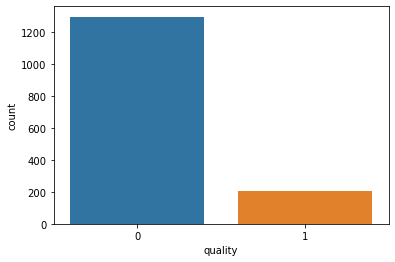

In [296]:
sns.countplot(x='quality',data=data)

The data seems to be imbalanced. We can resample the data using oversampling

In [297]:
#OverSAMPLING the data which will remove imabalance among data

from sklearn.utils import resample
bad_wine=data[data.quality==0]
good_wine=data[data.quality==1]

In [298]:
goodwine_unsampled=resample(good_wine,replace=True,n_samples=len(bad_wine),random_state=27)

In [299]:
new_data=pd.concat([goodwine_unsampled,bad_wine])

In [300]:
new_data.shape

(2594, 9)

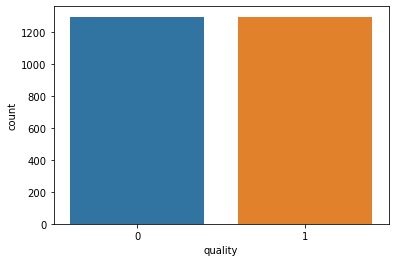

In [301]:
sns.countplot(x='quality',data=new_data)

In [302]:
data=new_data

Now we have same datas for goodwine and badwine

# Skewness Removal

In [303]:
#initialising x and y

x=data.drop('quality',axis=1)
y=data['quality']

In [304]:
x.skew()

fixed acidity           0.554962
volatile acidity        0.546539
citric acid             0.039740
total sulfur dioxide    1.362949
density                 0.112071
pH                      0.111737
sulphates               0.554208
alcohol                 0.276250
dtype: float64

In [305]:
x['total sulfur dioxide']=np.cbrt(x['total sulfur dioxide'])

In [306]:
x.skew()

fixed acidity           0.554962
volatile acidity        0.546539
citric acid             0.039740
total sulfur dioxide    0.484617
density                 0.112071
pH                      0.111737
sulphates               0.554208
alcohol                 0.276250
dtype: float64

There was skewness only for total sulfur dioxide which was corrected

In [307]:
#checking multicollinearity and scaling data

SC=StandardScaler()
X=SC.fit_transform(x)

In [308]:
x=pd.DataFrame(X,columns=x.columns)

In [309]:
x.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [310]:
x.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.129133,0.252476,-1.087176,0.591553,0.629924,0.234363,1.259076,-0.250114
1,-0.455766,-1.166771,-0.041280,0.024613,-0.667181,-0.185774,1.549462,0.363820
2,-0.397276,0.962100,-1.037372,-1.347343,1.062293,0.444432,0.024936,-0.688639
3,0.538562,-1.225907,1.104226,-0.811382,-0.126721,-0.745957,3.219181,0.977754
4,1.123461,-0.220606,2.100318,1.370337,1.386569,-0.956026,1.186479,0.977754


In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns

In [312]:
vif.round(1)

,vif,features
0,6.4,fixed acidity
1,2.0,volatile acidity
2,3.7,citric acid
3,1.2,total sulfur dioxide
4,4.5,density
5,3.1,pH
6,1.3,sulphates
7,2.7,alcohol


There is no multicollinearity column. So we can proceed.

-----------------------------------------------------END OF EDA----------------------------------------------------------------------------------------------------

# Model Building

In [313]:
#x,y already initialized
x.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.129133,0.252476,-1.087176,0.591553,0.629924,0.234363,1.259076,-0.250114
1,-0.455766,-1.166771,-0.041280,0.024613,-0.667181,-0.185774,1.549462,0.363820
2,-0.397276,0.962100,-1.037372,-1.347343,1.062293,0.444432,0.024936,-0.688639
3,0.538562,-1.225907,1.104226,-0.811382,-0.126721,-0.745957,3.219181,0.977754
4,1.123461,-0.220606,2.100318,1.370337,1.386569,-0.956026,1.186479,0.977754


In [314]:
y.value_counts()

1    1297
0    1297
Name: quality, dtype: int64

In [315]:
x.shape

(2594, 8)

In [316]:
y.shape

(2594,)

In [317]:
#finding best random_state
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.838973162193699  on random_state  112


In [318]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=112)

In [319]:
x_train.shape

(1737, 8)

In [320]:
x_test.shape

(857, 8)

In [321]:
from sklearn.ensemble import VotingClassifier

In [322]:
# different algorithm going to use

lg=LogisticRegression(multi_class='multinomial')
gnb=GaussianNB()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
vc=(VotingClassifier(estimators=[('lg', lg), ('rf', rf), ('gnb', gnb),('ad',ad),('dtc',dtc),('sv',sv)], voting='hard'))

In [323]:
#code for Training and Prediction 

def eval(x):
    mod=x
    print(mod)
    mod.fit(x_train,y_train)
    enecccchllvnunbencdhbcllkctuevbbcefinviktnrr
    
    print("accuracy score is :",accuracy_score(y_test,pred))
    print("\n")
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [324]:
#calling function to run model

eval(lg)

LogisticRegression(multi_class='multinomial')
accuracy score is : 0.838973162193699


Confusion Matrix : 
 [[349  75]
 [ 63 370]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       424
           1       0.83      0.85      0.84       433

    accuracy                           0.84       857
   macro avg       0.84      0.84      0.84       857
weighted avg       0.84      0.84      0.84       857



In [325]:
eval(gnb)

GaussianNB()
accuracy score is : 0.7876312718786465


Confusion Matrix : 
 [[325  99]
 [ 83 350]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       424
           1       0.78      0.81      0.79       433

    accuracy                           0.79       857
   macro avg       0.79      0.79      0.79       857
weighted avg       0.79      0.79      0.79       857



In [326]:
eval(sv)

SVC()
accuracy score is : 0.8669778296382731


Confusion Matrix : 
 [[363  61]
 [ 53 380]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       424
           1       0.86      0.88      0.87       433

    accuracy                           0.87       857
   macro avg       0.87      0.87      0.87       857
weighted avg       0.87      0.87      0.87       857



In [327]:
eval(dtc)

DecisionTreeClassifier()
accuracy score is : 0.9486581096849475


Confusion Matrix : 
 [[382  42]
 [  2 431]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.99      0.90      0.95       424
           1       0.91      1.00      0.95       433

    accuracy                           0.95       857
   macro avg       0.95      0.95      0.95       857
weighted avg       0.95      0.95      0.95       857



In [328]:
eval(rf)

RandomForestClassifier()
accuracy score is : 0.9731621936989499


Confusion Matrix : 
 [[401  23]
 [  0 433]]


Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       424
           1       0.95      1.00      0.97       433

    accuracy                           0.97       857
   macro avg       0.97      0.97      0.97       857
weighted avg       0.97      0.97      0.97       857



In [329]:
eval(VotingClassifier(estimators=[('lg', lg), ('rf', rf), ('gnb', gnb),('ad',ad),('dtc',dtc),('sv',sv)], voting='hard'))

VotingClassifier(estimators=[('lg',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB()),
                             ('ad', AdaBoostClassifier(n_estimators=100)),
                             ('dtc', DecisionTreeClassifier()), ('sv', SVC())])
accuracy score is : 0.8996499416569428


Confusion Matrix : 
 [[381  43]
 [ 43 390]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       424
           1       0.90      0.90      0.90       433

    accuracy                           0.90       857
   macro avg       0.90      0.90      0.90       857
weighted avg       0.90      0.90      0.90       857



# From all the algorithm, random forest classifier gives high accuracy of 97.31%. Let us cross check with cross validation score

# Cross_Validation

In [330]:
model=[lg,gnb,sv,rf,dtc,ad,vc]

for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print(m,"Cross val score is ",score)
    print("mean is ",score.mean())

LogisticRegression(multi_class='multinomial') Cross val score is  [0.86319846 0.75722543 0.83236994 0.71868979 0.78185328]
mean is  0.7906673808407912
GaussianNB() Cross val score is  [0.85356455 0.68400771 0.8150289  0.70520231 0.77606178]
mean is  0.7667730488539737
SVC() Cross val score is  [0.89980732 0.80732177 0.87475915 0.73988439 0.84362934]
mean is  0.8330803966642117
RandomForestClassifier() Cross val score is  [0.98073218 0.93834297 0.96146435 0.92292871 0.95559846]
mean is  0.9518133327381882
DecisionTreeClassifier() Cross val score is  [0.96339114 0.91136802 0.9460501  0.9017341  0.90926641]
mean is  0.926361952373513
AdaBoostClassifier(n_estimators=100) Cross val score is  [0.94219653 0.83815029 0.9017341  0.82080925 0.84555985]
mean is  0.86969000379405
VotingClassifier(estimators=[('lg',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', Gaussia

The trained model doesn't seems to be overfitting 

Random forest classifier algorithm seems to be best model with a cross validation score of 95.18 % accuracy and actual model score of 97.31 % accuracy. The difference in percentage is low in random forest classifier model. Hence rf is taken as final model

Random forest classifier algorithm is Best to be used as final model. Let us do hyperparameter tuning to check if it is increasing the accuracy

# Hyper Parameter Tuning  -  GridSearchCV

In [200]:
#parameters of randomforest classifier
grid_params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20,3),
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' :range(1,10,2),
    'min_samples_split' :range(2,10,2), 
}

In [201]:
from sklearn.model_selection import GridSearchCV

grid_rf= GridSearchCV(estimator=rf,param_grid=grid_params,cv= 5)

In [202]:
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [200, 500]})

In [203]:
best_parameters=grid_rf.best_params_

In [204]:
best_parameters

{'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [205]:
grid_rf.best_score_

0.9602752658253007

In [206]:
rfc=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=17,criterion='gini',min_samples_leaf=1,min_samples_split=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=200)

In [207]:
eval(rfc)

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=200)
accuracy score is : 0.9684947491248541


Confusion Matrix : 
 [[401  23]
 [  4 429]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       424
           1       0.95      0.99      0.97       433

    accuracy                           0.97       857
   macro avg       0.97      0.97      0.97       857
weighted avg       0.97      0.97      0.97       857



In [208]:
score=cross_val_score(rfc,x,y,cv=5)
print(rfc,"Cross val score is ",score)
print("mean is ",score.mean())

RandomForestClassifier(max_depth=17, max_features='sqrt', n_estimators=200) Cross val score is  [0.98265896 0.93063584 0.9672447  0.9132948  0.95752896]
mean is  0.9502726508506856


The hyper parameter tuning of Random forest classifier gives actual accuracy of 96.84 % and cross val of 95.02 %. Since there is no accuracy increase for hypertuned parameter. The actual model of RandomForestClassfier algorithm is selected for final output. Since Hyperparamter tuning taking a lot of time, it is performed only for top model to see whetehr it is improving the accuracy.

In [331]:
rf.score(x_test,y_test)

0.9731621936989499

In [333]:
rf.score(x_train,y_train)

1.0

It is not a overfitting model. Let us now see which model covers the maximum area under curve.

# AUC_ROC CURVE

In [334]:
#code for AUC_ROC CURVE

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

def auc_roc(mod):
    plot_roc_curve(mod,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    

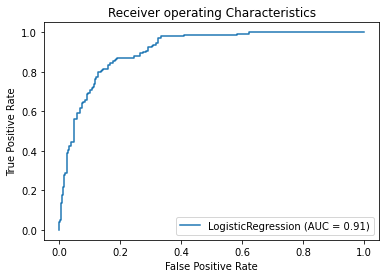

In [335]:
auc_roc(lg)

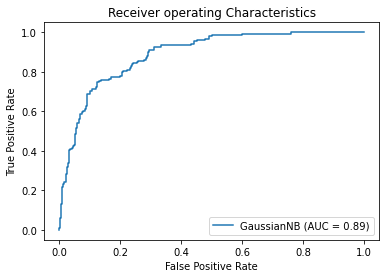

In [336]:
auc_roc(gnb)

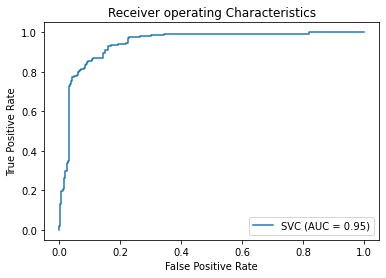

In [337]:
auc_roc(sv)

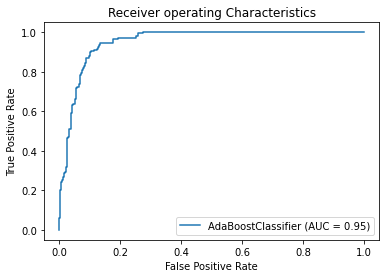

In [341]:
ad=ad.fit(x_train,y_train)

plot_roc_curve(ad,x_test,y_test)
plt.title('Receiver operating Characteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
    

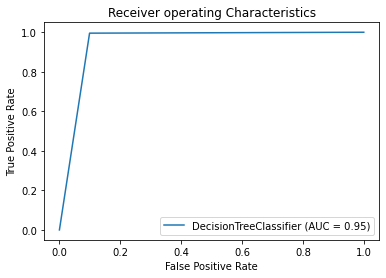

In [345]:
auc_roc(dtc)

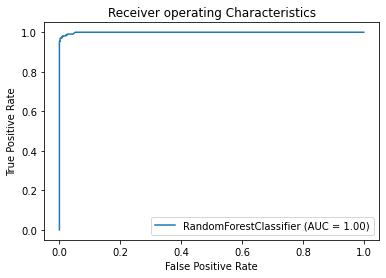

In [346]:
auc_roc(rf)

The area under curve is high for RandomForestClassifier with AUC score of 1.00. That means 100% of area under curve is covered in this model. 

# RandomForestClassifier Model is the final model with accuracy of 97.31%

# As seen above, random forest (rf) covers the maximum area. Therefore rf is selected as the final model with true accuracy of 97.31%

# Conclusion

In [347]:
joblib.dump(rf,"rf_qualitywine_prediction.obj")

['rf_qualitywine_prediction.obj']

In [348]:
#Lets Check loading the file 

winequality_prediction=joblib.load("rf_qualitywine_prediction.obj")

In [349]:
winequality_prediction.score(x_test,y_test)

0.9731621936989499

In [351]:
pred=rf.predict(x_test)
Conclusion=pd.DataFrame([winequality_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])

In [352]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,847,848,849,850,851,852,853,854,855,856
Predicted,1,1,1,1,0,1,0,0,1,1,...,1,1,1,0,1,0,1,0,1,1
Original,1,1,1,1,0,1,0,0,1,1,...,1,1,1,0,1,0,1,0,1,1


we can see it is giving exact data as result. The model is working well

The datas predicted are perfectly matching. The jobfile created is working well almost giving very good accuracy.

After Training and Testing six algorithm model. The best accuracy model was determined as random forest classifier with 97% true accuracy after all the data cleaning, pre-processing, training and prediction as well as evaluation phase.

Good wine Quality can be easily predicted now through this model

# Model Created Succesfully